**Vamos experimentar agora o algoritmo Decision Tree?**

In [1]:
!pip -q install yellowbrick

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [2]:
import pickle
with open('titanic/titanic.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

**Importando a biblioteca de ajuste de hiperparâmetros**

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

modelo = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=10,
    n_jobs=5,
    verbose=1,
)

In [5]:
modelo.fit(X_treino, y_treino)
print(modelo.best_params_)
print(modelo.best_score_)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


/home/gabriel/gabriel/IA-PUC/venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


{'criterion': 'gini', 'max_depth': 8, 'max_features': None}
0.8623435054773083


**Agora precisamos rodar a árvore com os hiperparâmetros obtidos**

In [6]:
modelo= DecisionTreeClassifier(max_depth=10, criterion='gini', max_features=0.4)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=10, max_features=0.4)



> **Vamos testar o modelo?**



In [7]:

previsoes = modelo.predict(X_teste)

In [8]:
previsoes

array([2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 2,
       2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2])



> **Será se o modelo acertou?**



In [9]:
y_teste

709    0
439    2
840    2
720    2
39     0
      ..
433    2
773    0
25     2
84     2
10     2
Name: Embarked, Length: 179, dtype: int64

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.7932960893854749

In [12]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[ 23,   0,  20],
       [  0,  14,   3],
       [ 10,   4, 105]])

/home/gabriel/gabriel/IA-PUC/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.7932960893854749

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

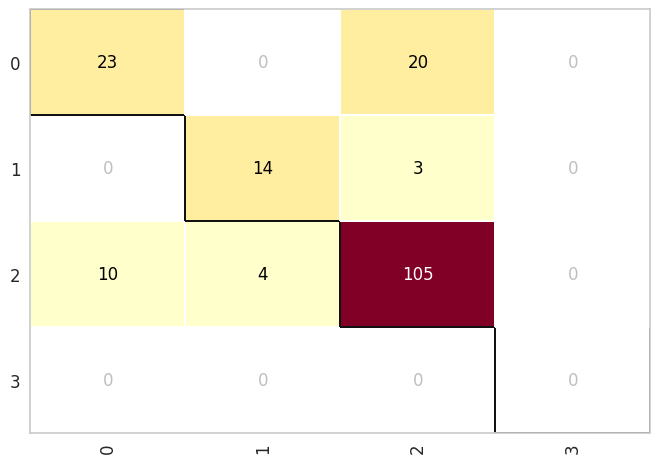

In [13]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [14]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.70      0.53      0.61        43
           1       0.78      0.82      0.80        17
           2       0.82      0.88      0.85       119

    accuracy                           0.79       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.79      0.79      0.79       179



IndexError: list index out of range

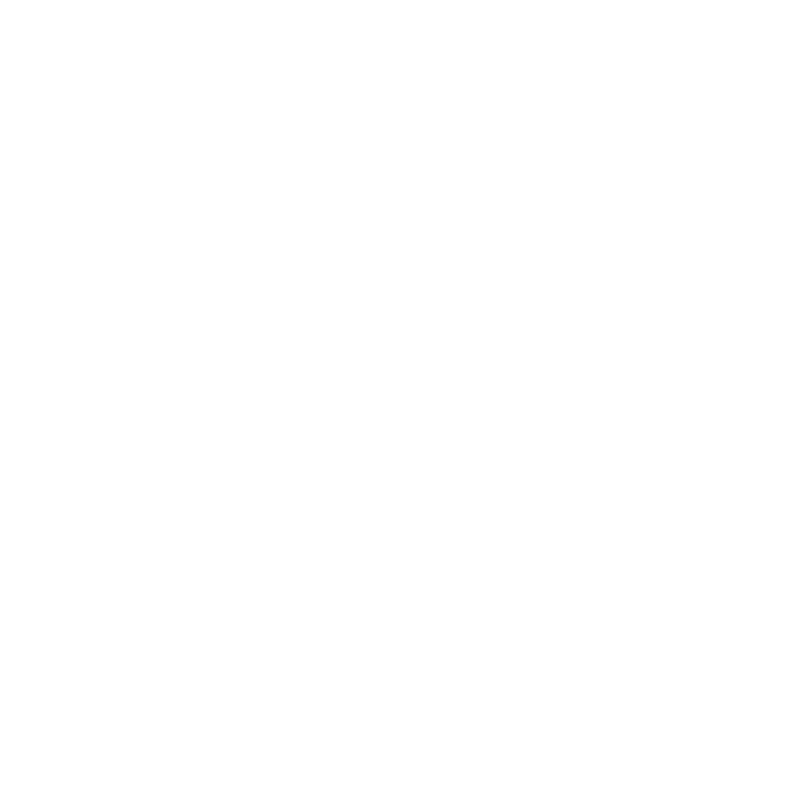

In [15]:
from sklearn import tree
previsores = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True);